## Working with Multiclass Classification

When more than two classes it is multiclass classification


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [3]:
# data in tf datasets already sorted as train and test
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# show training sample
print(f"Training Sample : \n{train_data[0]}\n")
print(f"Training Label : \n{train_labels[0]}\n")


Training Sample : 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [5]:
# check single sample size
train_data[0].shape, train_labels[0].shape

((28, 28), ())

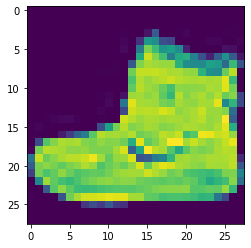

In [6]:
# plot single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

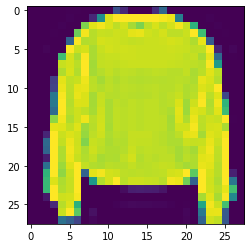

In [7]:
plt.imshow(train_data[7])

In [8]:
# Create list of train labels (class names)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Coat')

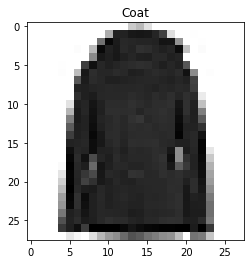

In [9]:
# plot
index_of_choice = 2000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


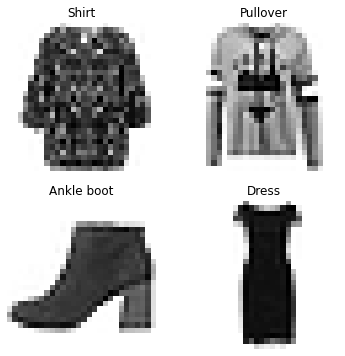

In [10]:
# plot rabdin unages frin fashion_mnist
import random
plt.figure(figsize=(6, 6))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)



## Build Multiclass Classification Model

Check of these if shape error
- input_shape
- output_shape
- loss function : in loss function if one-hot encoded use CategoricalCrossEntropy, if integer form use SparseCategoricalCrossEntropy

In [11]:
# set seed
tf.random.set_seed(42)

# create model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(4, activation="relu"))
model_1.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
non_norm_history_1 = model_1.fit(train_data, tf.one_hot(train_labels, depth=10), 
                                 epochs=10, 
                                 validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [13]:
# check min and max values for train data
train_data.min(), train_data.max()

(0, 255)

In [14]:
# Normalize / Scale training and test data by dividing with 255 (max value)
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check min/max of scaled data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [15]:
# Build model on scaled / normalized data

# set seed
tf.random.set_seed(42)

# create model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile model
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit model
norm_history_2 = model_2.fit(train_data_norm, train_labels, 
                                 epochs=10, 
                                 validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

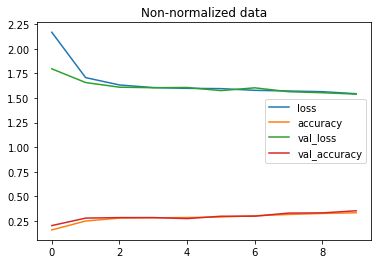

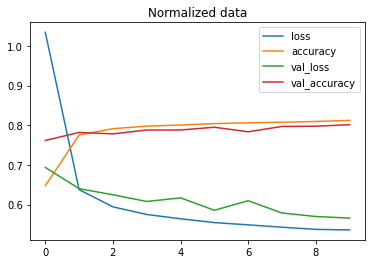

In [16]:
# plot loss curves on both models
import pandas as pd

# Non Normalized data model
pd.DataFrame(non_norm_history_1.history).plot(title="Non-normalized data")

# Normalized data model
pd.DataFrame(norm_history_2.history).plot(title="Normalized data")

In [17]:
# Find Ideal learning rate

In [31]:
# set seed
tf.random.set_seed(42)

# create model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_3.add(tf.keras.layers.Dense(4, activation="relu"))
model_3.add(tf.keras.layers.Dense(4, activation="relu"))
model_2.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile model
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit model
find_lr_history_3 = model_2.fit(train_data_norm, train_labels, 
                                epochs=40, 
                                validation_data=(test_data_norm, test_labels),
                                callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5036 - accuracy: 0.8214 - val_loss: 0.5593 - val_accuracy: 0.8062
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5045 - accuracy: 0.8205 - val_loss: 0.5756 - val_accuracy: 0.7993
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.8204 - val_loss: 0.5620 - val_accuracy: 0.8006
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5046 - accuracy: 0.8204 - val_loss: 0.5701 - val_accuracy: 0.8005
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5064 - accuracy: 0.8190 - val_loss: 0.5675 - val_accuracy: 0.8061
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5067 - accuracy: 0.8191 - val_loss: 0.5612 - val_accuracy: 0.8038
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5088 - accuracy: 0.8184 - val_loss: 0.5764 - val_accuracy:

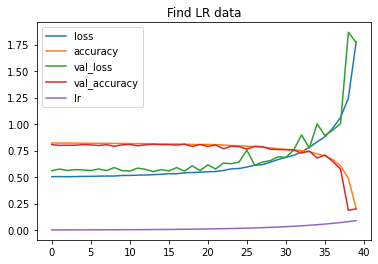

In [32]:
# Find LR data model
pd.DataFrame(find_lr_history_3.history).plot(title="Find LR data")



Text(0.5, 1.0, 'Finding Ideal Learning Rate')

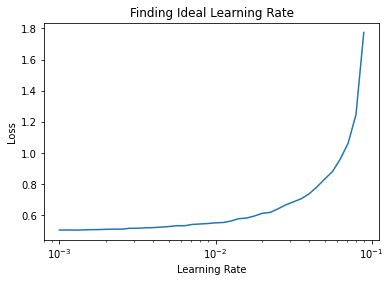

In [33]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history_3.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")


In [ ]:
# Ideal learning rate is same as the default learning rate of Adam optimizer (0.001). Lets re-fit model with ideal learning rate

In [35]:
# set seed
tf.random.set_seed(42)

# create model
model_4 = tf.keras.Sequential()
model_4.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_4.add(tf.keras.layers.Dense(4, activation="relu"))
model_4.add(tf.keras.layers.Dense(4, activation="relu"))
model_4.add(tf.keras.layers.Dense(10, activation="softmax"))

# compile model
model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# fit model
lr_history_4 = model_4.fit(train_data_norm, train_labels, 
                           epochs=20, 
                           validation_data=(test_data_norm, test_labels))


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluate Multiclass Classification Model
- Evaluate using Confusion Metrics
- Assess predictions
- Save & Export Model

In [44]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  # create cm
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize cm
  n_classes = cm.shape[0]

  # pettify CM
  fig, ax = plt.subplots(figsize=figsize)

  # create matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  # set x-axis labesl at bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set Threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # plot text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)


In [37]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [39]:
# make predictions on model_4
y_probs = model_4.predict(test_data_norm)  # probs is short form of prediction probability

# view first 5 predictions
y_probs[:5]


array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

## Note
Make predictions on same data where model was trained on. Eg. if model was trained on Normalized data, make predictions on same normalized data

In [40]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [41]:
# convert all of prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# view first 10 prediction labels
y_preds[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [42]:
# create confusion matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)


array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

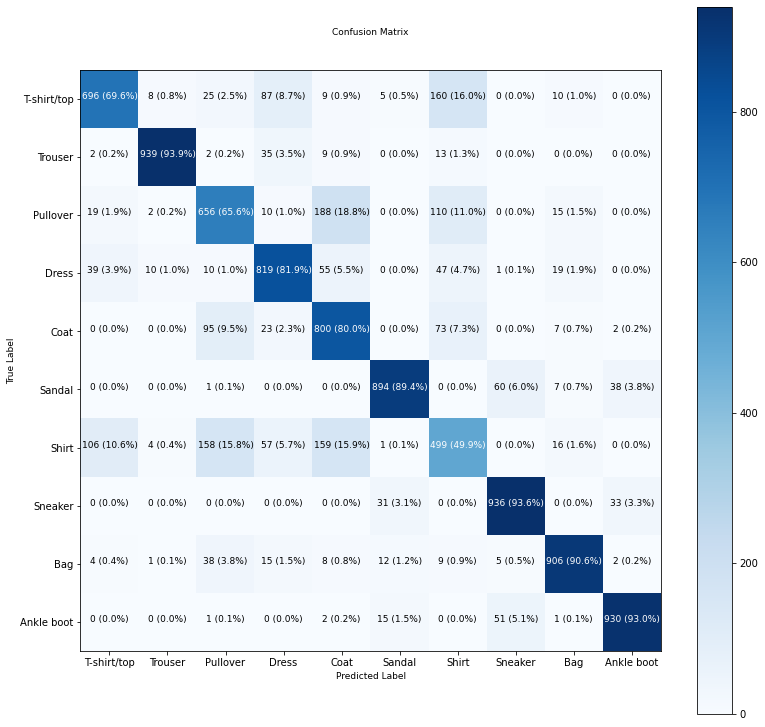

In [46]:
# Make prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13, 13),
                      text_size=9)

## Note
Create a function to visualize the data to understand input and outputs of models

In [53]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Pick random image, plot and label it with prediction and truch label
  """
  # set a random integer
  i = random.randint(0, len(images))

  # create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # change color of titles depending on the prediction if right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # add X-label information
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label),
             color=color)
  



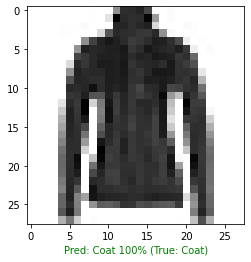

In [64]:
# check random image and its prediction
plot_random_image(model=model_4, images=test_data, true_labels=test_labels, classes=class_names)


## Patterns our Model is learning

In [65]:
# Layers used in the Model
model_4.layers

In [66]:
# Extract particular layer
model_4.layers[1]

In [67]:
# get patterns of layer in network
weights, biases = model_4.layers[1].get_weights()

# shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [68]:
# biasses and bias shapes
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

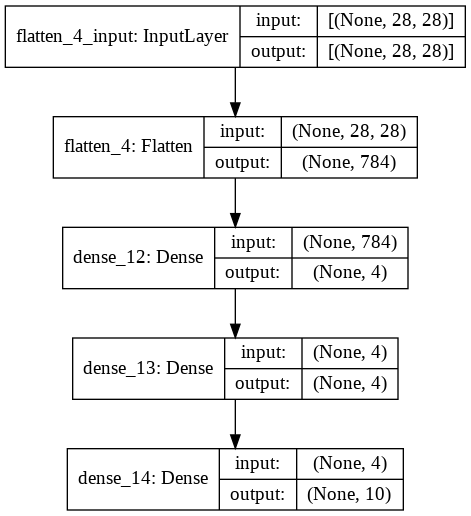

In [69]:
# Check deep learning models
from tensorflow.keras.utils import plot_model

# view input andoutput of each layer
plot_model(model_4, show_shapes=True)
